Tugas Akhir : 

### Analisis Sentimen Mitra untuk Telkom University Pada Media Sosial Twitter Menggunakan Algoritma Decision Tree (CART)

Sean Akbar Ryanto (1301180258)

# Library Package

## Install Library

In [1]:
# Library package untuk preprocessing stopwords removal dan stemming
!pip install PySastrawi
!pip install -U nltk
!pip install googletrans==3.1.0a0
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Library

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
nltk.download('punkt')
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import matplotlib.pyplot as plt
import seaborn as sns 

from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Sentimen

## Read Data

In [3]:
data = pd.read_csv('Dataset Internal Labelled.csv')
data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,1
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",0
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,0
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,1
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",1
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,0
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,0
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",0
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,0


In [4]:
data['Sentiment'].replace(to_replace = -1, value = 'negatif', inplace=True)
data['Sentiment'].replace(to_replace = 0, value = 'netral', inplace=True)
data['Sentiment'].replace(to_replace = 1, value = 'positif', inplace=True)

data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,positif
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",netral
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,netral
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,positif
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",positif
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,netral
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,netral
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",netral
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,netral


Text(0.5, 0, 'Sentimen')

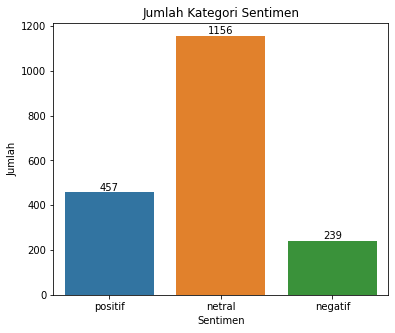

In [5]:
# Menampilkan jumlah kategori sentimen yang dimiliki pada data
f , ax = plt.subplots(figsize = (6,5))
ax = sns.countplot(x='Sentiment', data=data)
ax.bar_label(ax.containers[0])
plt.title('Jumlah Kategori Sentimen', y=1, size=12)
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')

In [6]:
data['Sentiment'].value_counts()

netral     1156
positif     457
negatif     239
Name: Sentiment, dtype: int64

In [7]:
# Menyalin data yang dimiliki kedalam variabel lain
sentimen1 = data.copy()

## Translate Data

In [ ]:
# from googletrans import Translator

# translator = Translator()

In [ ]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(translator.translate, src='en', dest='id')

In [ ]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(getattr, args=('text',))

# sentimen1

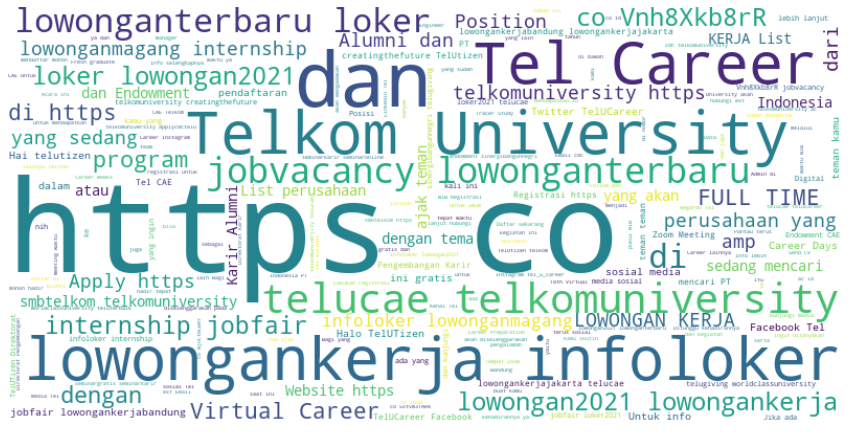

In [8]:
# Start with one review:
all_data = pd.DataFrame(' '.join(sentimen1['Text Tweet'].tolist()), columns=['Text Tweet'], index=[0])
text = all_data['Text Tweet'][0]

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Oversampling

In [9]:
x_imb = sentimen1['Text Tweet']
y_imb = sentimen1['Sentiment'] 

In [10]:
x_imb = x_imb.values.reshape(-1, 1)

In [11]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(sampling_strategy='minority')
x_os, y_os = ros.fit_resample(x_imb, y_imb)
x_os, y_os = ros.fit_resample(x_os, y_os)

In [12]:
Counter(y_os)

Counter({'negatif': 1156, 'netral': 1156, 'positif': 1156})

Text(0.5, 0, 'Sentimen')

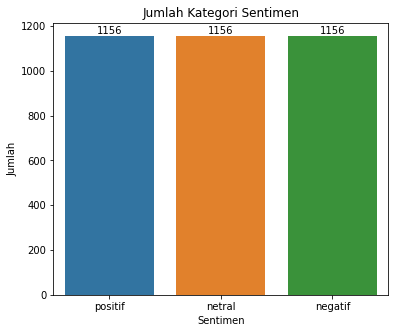

In [13]:
# Menampilkan jumlah kategori sentimen yang dimiliki pada data
f , ax = plt.subplots(figsize = (6,5))
ax = sns.countplot(x=y_os, data=sentimen1)
ax.bar_label(ax.containers[0])
plt.title('Jumlah Kategori Sentimen', y=1, size=12)
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')

# Data Splitting

In [14]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 80:20
x1 = x_os.flatten()
y1 = y_os

from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20 , shuffle=True, random_state=123)

In [15]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 75:25
x2 = x_os.flatten()
y2 = y_os

from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25 , shuffle=True, random_state=123)

In [16]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 70:30
x3 = x_os.flatten()
y3 = y_os

from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.30 , shuffle=True, random_state=123)

# Feature Extraction TF-IDF (80:20)

## Proses Pembobotan TF-IDF

In [17]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x1_train_tfidf = vector.transform(x1_train.astype(str))
x1_test_tfidf = vector.transform(x1_test)

## Hasil Pembobotan TF-IDF

In [18]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x1_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
6754,telkomuniversity,0.056379
6759,telucae,0.055766
1496,co,0.039435
2853,https,0.038949
4066,lowongankerjajakarta,0.030684
...,...,...
3735,korea,0.000000
6207,sense,0.000000
3756,ks6kntqiyc,0.000000
7095,uhhvamuchf,0.000000


In [19]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x1_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
6759,telucae,0.057343
6754,telkomuniversity,0.055329
1496,co,0.038228
2853,https,0.037958
4066,lowongankerjajakarta,0.035250
...,...,...
4478,mentor,0.000000
4479,mentoring,0.000000
1693,datashare,0.000000
4482,menuasai,0.000000


# Feature Extraction TF-IDF (75:25)

## Proses Pembobotan TF-IDF

In [20]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x2_train_tfidf = vector.transform(x2_train.astype(str))
x2_test_tfidf = vector.transform(x2_test)

## Hasil Pembobotan TF-IDF

In [21]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x2_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
6754,telkomuniversity,0.055834
6759,telucae,0.054794
1496,co,0.039129
2853,https,0.038609
4066,lowongankerjajakarta,0.029633
...,...,...
2496,fyratdokf4,0.000000
4445,mengobati,0.000000
4443,mengkampanyekan,0.000000
2502,g3epbjbgwh,0.000000


In [22]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x2_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
6759,telucae,0.059943
6754,telkomuniversity,0.057172
1496,co,0.039385
2853,https,0.039175
4066,lowongankerjajakarta,0.037491
...,...,...
4747,native,0.000000
4748,natuno,0.000000
4750,nbpdlfeysn,0.000000
1902,dimiliki,0.000000


# Feature Extraction TF-IDF (70:30)

## Proses Pembobotan TF-IDF

In [23]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x3_train_tfidf = vector.transform(x3_train.astype(str))
x3_test_tfidf = vector.transform(x3_test)

## Hasil Pembobotan TF-IDF

In [24]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x3_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
6754,telkomuniversity,0.056121
6759,telucae,0.055437
1496,co,0.038410
2853,https,0.037882
4066,lowongankerjajakarta,0.029992
...,...,...
4143,mahanran,0.000000
2679,h9wmxurats,0.000000
6703,tc,0.000000
1391,central,0.000000


In [25]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x3_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
6759,telucae,0.057583
6754,telkomuniversity,0.056279
1496,co,0.041020
2853,https,0.040777
4066,lowongankerjajakarta,0.035341
...,...,...
2109,e5cnqp5jns,0.000000
2108,e4smtkult1,0.000000
5023,pager,0.000000
2107,e3akiji7ty,0.000000


# Klasifikasi

In [26]:
# Library package untuk evaluasi model dengan nilai akurasi
from sklearn.metrics import accuracy_score

# Library package untuk evaluasi keseluruhan performa model
from sklearn.metrics import classification_report

## Hyperparameter Tuning GridSearchCV (80:20)

In [61]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV    # Library package untuk menggunakan validasi GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf1 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf1.fit(x1_train_tfidf, y1_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf1.best_params_)

best parameter :  {'max_depth': 28, 'splitter': 'best'}


In [62]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf1.best_score_)

accuracy :  0.8237241253928266


### Decision Tree 80:20

In [68]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=28)
dt_clf1.fit(x1_train_tfidf, y1_train)

# Memprediksi label sentimen dengan data validasi
dt_predict1 = dt_clf1.predict(x1_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict1, y1_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict1, y1_test, digits=4))

Decision Tree Accuracy Score: 81.5562 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.9733    0.9563    0.9648       229
      netral     0.6008    0.8412    0.7010       170
     positif     0.8831    0.6915    0.7757       295

    accuracy                         0.8156       694
   macro avg     0.8191    0.8297    0.8138       694
weighted avg     0.8437    0.8156    0.8198       694



## Confusion Matrix 80:20

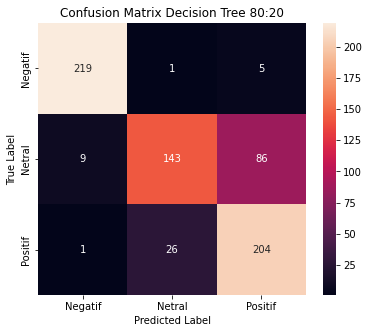

In [69]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y1_test, dt_predict1)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 80:20", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (75:25)

In [99]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf2 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf2.fit(x2_train_tfidf, y2_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf2.best_params_)

best parameter :  {'max_depth': 29, 'splitter': 'random'}


In [100]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf2.best_score_)

accuracy :  0.8227659888004716


### Decision Tree 75:25

In [108]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=29)
dt_clf2.fit(x2_train_tfidf, y2_train)

# Memprediksi label sentimen dengan data validasi
dt_predict2 = dt_clf2.predict(x2_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict2, y2_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict2, y2_test, digits=4))

Decision Tree Accuracy Score: 81.8916 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.9749    0.9510    0.9628       286
      netral     0.6510    0.8117    0.7225       239
     positif     0.8414    0.7135    0.7722       342

    accuracy                         0.8189       867
   macro avg     0.8224    0.8254    0.8192       867
weighted avg     0.8329    0.8189    0.8214       867



## Confusion Matrix Decision Tree 75:25

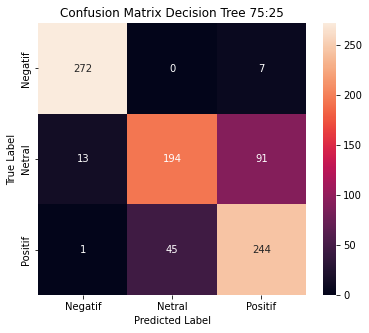

In [109]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y2_test, dt_predict2)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 75:25", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (70:30)

In [110]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf3 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf3.fit(x3_train_tfidf, y3_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf3.best_params_)

best parameter :  {'max_depth': 28, 'splitter': 'random'}


In [111]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf3.best_score_)

accuracy :  0.8273611536237799


### Decision Tree 70:30

In [115]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf3 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=28)
dt_clf3.fit(x3_train_tfidf, y3_train)

# Memprediksi label sentimen dengan data validasi
dt_predict3 = dt_clf3.predict(x3_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict3, y3_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict3, y3_test, digits=4))

Decision Tree Accuracy Score: 80.4995 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.9610    0.9275    0.9440       345
      netral     0.6158    0.8165    0.7021       267
     positif     0.8475    0.6993    0.7663       429

    accuracy                         0.8050      1041
   macro avg     0.8081    0.8144    0.8041      1041
weighted avg     0.8257    0.8050    0.8087      1041



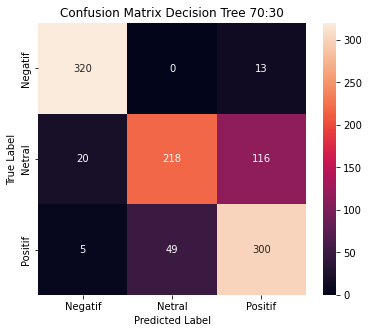

In [116]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y3_test, dt_predict3)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 70:30", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()